In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("/content/customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape


(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

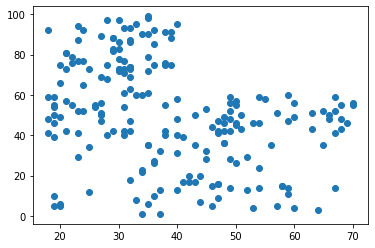

In [ ]:
#lets see the mixed category

plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.show()

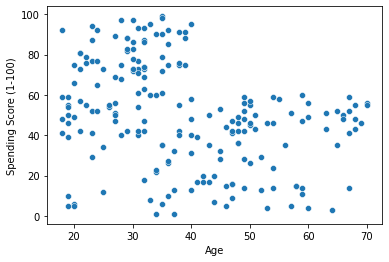

In [ ]:
# seaborn library

sns.scatterplot(data['Age'],data['Spending Score (1-100)'])
plt.show()

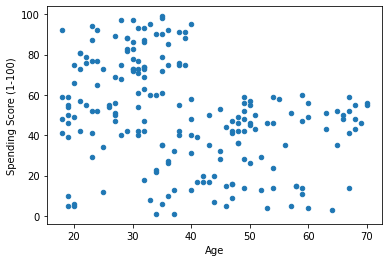

In [ ]:
# scatter plot with the help of pandas 

data.plot.scatter(x = 'Age', y = 'Spending Score (1-100)')
plt.show()

In [ ]:
# lets store Age and Spending score in X variable

X = data[['Age','Spending Score (1-100)']]

In [ ]:
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


## Plotting the Elbow curve - Calculation

In [ ]:
from sklearn.cluster import KMeans
Inter = []
for i in range(1,11):
  model1 = KMeans(n_clusters = i)
  model1.fit(X)
  Inter.append(model1.inertia_)


In [ ]:
Inter

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23810.46223307136,
 19566.522341377604,
 15514.19313435103,
 13055.626865965578,
 11494.459784255601,
 10192.197032682196]

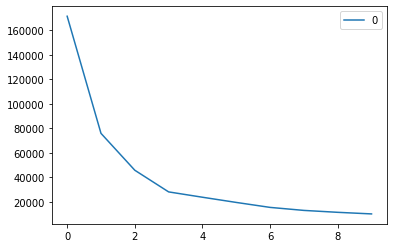

In [ ]:
# plot with the help of dataframe
pd.DataFrame(Inter).plot()

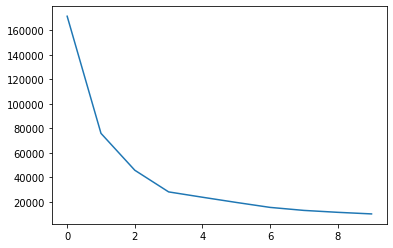

In [ ]:
# plot with the help of matplotlib
plt.plot(Inter)
plt.show()

In [ ]:
# now by seeing the graph, we can put k = 3

In [ ]:
new_model1 = KMeans(n_clusters = 3)

In [ ]:
new_model1.fit(X)

KMeans(n_clusters=3)

In [ ]:
# how to see the clusters
clusters = new_model1.labels_

In [ ]:
clusters

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [ ]:
# Lets Predict the output

new_model1.predict([[12,24]])

array([0], dtype=int32)

In [ ]:
X = X.assign(cluster = clusters)

In [ ]:
X

,Age,Spending Score (1-100),cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


In [ ]:
# Now we are going to plot the scatter plot which shows each category in each color

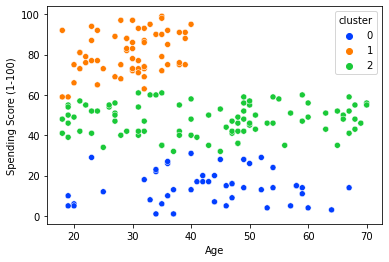

In [ ]:
sns.scatterplot('Age','Spending Score (1-100)',hue = 'cluster', data = X, palette ='bright' )

In [ ]:
# lets plot it with the help of dataframe

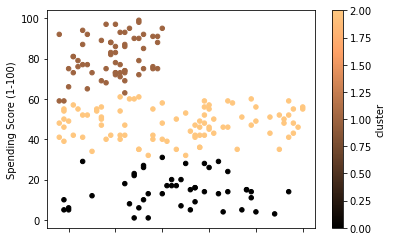

In [ ]:
X.plot.scatter(x = 'Age', y = 'Spending Score (1-100)', c= 'cluster', colormap = 'copper')